In [4]:
from skimage.io import imshow, imread, imsave
from PIL import Image
from skimage.measure import label
import numpy as np
from pycocotools.coco import COCO
import os

In [5]:
def generate_seg(source_ds, labels, out_folder, local_dataset_path=None):
    assert source_ds in ['train', 'val']
    if source_ds == 'train':
        coco = COCO('datasets/coco/annotations/instances_train2017.json')
    else:
        coco = COCO('datasets/coco/annotations/instances_val2017.json')
    
    catIds = coco.getCatIds(catNms=labels)
    cats = coco.loadCats(catIds)
    cats_id_to_name = {c['id']: c['name'] for c in cats}
    cats_name_to_id = {c['name']: c['id'] for c in cats}
    anns = coco.loadAnns(coco.getAnnIds(catIds=catIds))
    imgIds = [a['image_id'] for a in anns]
    imgs = coco.loadImgs(imgIds)

    os.makedirs(out_folder+'seg/', exist_ok=True)
    os.makedirs(out_folder+'png/', exist_ok=True)
    # anns and img contains one element per instance. We have to display them all on the same image
    
    db = {}
    for a, i in zip(anns, imgs):
        img_id = str(a['image_id'])
        if img_id not in db:
            db[img_id] = {'anns': [a], 'imgs': [i]}
        else:
            db[img_id]['anns'].append(a)
            db[img_id]['imgs'].append(i)
    
    for img_id, anns_imgs in db.items():
        anns = anns_imgs['anns']
        imgs = anns_imgs['imgs']
        img = imgs[0]
        if not(local_dataset_path and os.path.isfile(local_dataset_path + img['file_name'])):
            im = imread(img['coco_url'])
        else:
            im = imread(local_dataset_path+img['file_name'])
        mask = np.zeros([im.shape[0], im.shape[1]], dtype=np.uint8)
        # Preparing annotation mask
        for ann in anns:
            new_mask = coco.annToMask(ann)
            mask[new_mask==1] = int(ann['category_id'])

        imsave(out_folder+'png/'+img['file_name'].replace('.jpg', '.png'), im)
        imsave(out_folder+'seg/'+img['file_name'].replace('.jpg', '.png'), mask)
        print("\rDone {}".format(img_id), end="")

In [6]:
labels = ['bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe']
generate_seg('train', labels, 'datasets/coco_animals/train/', local_dataset_path='datasets/coco/train2017/')

loading annotations into memory...
Done (t=30.73s)
creating index...
index created!
Done 383991

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000555982.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done 208433

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000208433.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000483737.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done 339151

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000339151.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done 435451

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000219285.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done 237098

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: datasets/coco_animals/train/seg/000000115291.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done 564655

KeyboardInterrupt: 

In [7]:
source_ds='train'
out_folder='datasets/coco_animals/train/'
local_dataset_path='datasets/coco/train2017/'
assert source_ds in ['train', 'val']
if source_ds == 'train':
    coco = COCO('datasets/coco/annotations/instances_train2017.json')
else:
    coco = COCO('datasets/coco/annotations/instances_val2017.json')

catIds = coco.getCatIds(catNms=labels)
cats = coco.loadCats(catIds)
cats_id_to_name = {c['id']: c['name'] for c in cats}
cats_name_to_id = {c['name']: c['id'] for c in cats}
anns = coco.loadAnns(coco.getAnnIds(catIds=catIds))
imgIds = [a['image_id'] for a in anns]
imgs = coco.loadImgs(imgIds)

os.makedirs(out_folder+'seg/', exist_ok=True)
os.makedirs(out_folder+'png/', exist_ok=True)
# anns and img contains one element per instance. We have to display them all on the same image

db = {}
for a, i in zip(anns, imgs):
    img_id = str(a['image_id'])
    if img_id not in db:
        db[img_id] = {'anns': [a], 'imgs': [i]}
    else:
        db[img_id]['anns'].append(a)
        db[img_id]['imgs'].append(i)

for img_id, anns_imgs in db.items():
    anns = anns_imgs['anns']
    imgs = anns_imgs['imgs']
    img = imgs[0]
    if not(local_dataset_path and os.path.isfile(local_dataset_path + img['file_name'])):
        im = imread(img['coco_url'])
    else:
        im = imread(local_dataset_path+img['file_name'])
    mask = np.zeros([im.shape[0], im.shape[1]], dtype=np.uint8)
    # Preparing annotation mask
    for ann in anns:
        new_mask = coco.annToMask(ann)
        mask[new_mask==1] = int(ann['category_id'])
    break

loading annotations into memory...
Done (t=44.45s)
creating index...
index created!


In [9]:
from skimage.io import imshow

In [23]:
mask = np.zeros([im.shape[0], im.shape[1]], dtype=np.uint8)
mask[new_mask==1] = 18

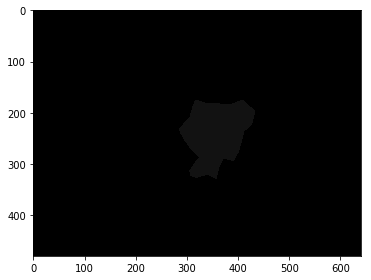

In [24]:
imshow(mask)

In [ ]:
check = {img_id: (len(db[img_id]['anns']), len(db[img_id]['imgs'])) for img_id in db.keys()}